In [11]:
#Thêm thư viện và đọc file excel
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/HOANG NAM/Desktop/Khai thác DL/lab2/bai2.csv')
df.head(10)

,TID,KEO,COMPA,THUOC,TAP TRANG,BUT BI,BUT MAU,TAY
0,T1,NaN,x,NaN,x,x,NaN,NaN
1,T2,x,NaN,x,x,x,NaN,NaN
2,T3,NaN,x,NaN,x,x,NaN,NaN
3,T4,x,x,NaN,x,x,NaN,NaN
4,T5,NaN,NaN,x,NaN,NaN,NaN,NaN
5,T6,NaN,NaN,NaN,NaN,x,NaN,NaN
6,T7,NaN,NaN,NaN,x,NaN,NaN,NaN
7,T8,NaN,NaN,NaN,NaN,NaN,NaN,x
8,T9,NaN,NaN,NaN,NaN,NaN,x,x
9,T10,NaN,NaN,NaN,NaN,NaN,x,NaN


In [12]:
#Hiển thị tên các columns
df.columns

Index(['TID', 'KEO', 'COMPA', 'THUOC', 'TAP TRANG', 'BUT BI', 'BUT MAU',
       'TAY'],
      dtype='object')

In [13]:
#Chuyển dữ liệu sang dang one-hot-endcoder
for dataset in df.columns:
    k=0
    df[dataset] = df[dataset].fillna(0)
    for i in df[dataset]:
        if i=='x':
            df[dataset][k]=1
        k = k+1

In [14]:
#Xóa columns dư thừa và hiển thị dữ liệu sau khi tiền xử lý
df = df.drop(['TID'],axis=1)
df.head(10)

,KEO,COMPA,THUOC,TAP TRANG,BUT BI,BUT MAU,TAY
0,0,1,0,1,1,0,0
1,1,0,1,1,1,0,0
2,0,1,0,1,1,0,0
3,1,1,0,1,1,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,1,1
9,0,0,0,0,0,1,0


In [20]:
#Chạy giải thuật Apriori với min_sup=0.3
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
itemsets = apriori(df, min_support=0.3, use_colnames=True)

itemsets['number_of_items'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets.head()

,support,itemsets,number_of_items
0,0.3,(COMPA),1
1,0.5,(TAP TRANG),1
2,0.5,(BUT BI),1
3,0.3,"(TAP TRANG, COMPA)",2
4,0.3,"(BUT BI, COMPA)",2


In [6]:
#Tìm luật của tập phổ biến với min_conf =0.8
rules = association_rules(itemsets, metric="confidence", min_threshold=0.8)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(COMPA),(TAP TRANG),0.3,0.5,0.3,1.0,2.0,0.15,inf
1,(COMPA),(BUT BI),0.3,0.5,0.3,1.0,2.0,0.15,inf
2,(TAP TRANG),(BUT BI),0.5,0.5,0.4,0.8,1.6,0.15,2.5
3,(BUT BI),(TAP TRANG),0.5,0.5,0.4,0.8,1.6,0.15,2.5
4,"(TAP TRANG, COMPA)",(BUT BI),0.3,0.5,0.3,1.0,2.0,0.15,inf


In [7]:
#Hiển thị luật tìm được
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],'==>',rules.loc[i,'consequents'],
         '[',rules.loc[i,'support'],',',rules.loc[i,'confidence'],']')

COMPA ==> TAP TRANG [ 0.3 , 1.0 ]
COMPA ==> BUT BI [ 0.3 , 1.0 ]
TAP TRANG ==> BUT BI [ 0.4 , 0.8 ]
BUT BI ==> TAP TRANG [ 0.4 , 0.8 ]
TAP TRANG ==> BUT BI [ 0.3 , 1.0 ]
BUT BI ==> TAP TRANG [ 0.3 , 1.0 ]
COMPA ==> TAP TRANG [ 0.3 , 1.0 ]


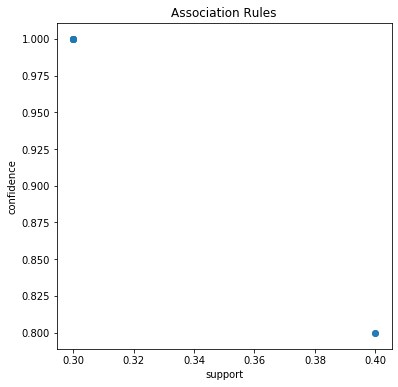

In [8]:
#Vẽ đồ thị
support = rules['support'].values
confidence=rules['confidence'].values
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence,fit_reg=False)

In [9]:
#Thực hiển giải thuật FpGrowth với min_sup=0.3
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(df, min_support=0.3, use_colnames=True)
itemsets.head()

,support,itemsets
0,0.5,(BUT BI)
1,0.5,(TAP TRANG)
2,0.3,(COMPA)
3,0.4,"(TAP TRANG, BUT BI)"
4,0.3,"(TAP TRANG, COMPA)"


In [10]:
#Hiển thị các luật tìm được
rules = association_rules(itemsets, metric="confidence", min_threshold=0.8)
rules.head()
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],'==>',rules.loc[i,'consequents'],
         '[',rules.loc[i,'support'],',',rules.loc[i,'confidence'],']')

TAP TRANG ==> BUT BI [ 0.4 , 0.8 ]
BUT BI ==> TAP TRANG [ 0.4 , 0.8 ]
COMPA ==> TAP TRANG [ 0.3 , 1.0 ]
COMPA ==> BUT BI [ 0.3 , 1.0 ]
TAP TRANG ==> BUT BI [ 0.3 , 1.0 ]
BUT BI ==> TAP TRANG [ 0.3 , 1.0 ]
COMPA ==> TAP TRANG [ 0.3 , 1.0 ]
